In [51]:
import numpy as np
import pandas as pd

from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [26]:
ticker_list = ["aapl", "goog", "msft", "qqq"]

In [45]:
def get_daily_change(symbol):
    
    data = pd.read_csv(f"{symbol}_data.csv")
    

    if symbol == "qqq":
        atclose = np.array(data["Close/Last"])
        atopen = np.array(data["Open"])
    else:
        atclose = np.array([float(d[1:]) for d in data["Close/Last"]])
        atopen = np.array([float(d[1:]) for d in data["Open"]])
        
    change = 100*(atclose - atopen) / atopen
    
    return change

In [57]:
change_array = []

In [58]:
for t in ticker_list:
    change = get_daily_change(t)
    change_array.append(change)

In [59]:
change_array = np.array(change_array)

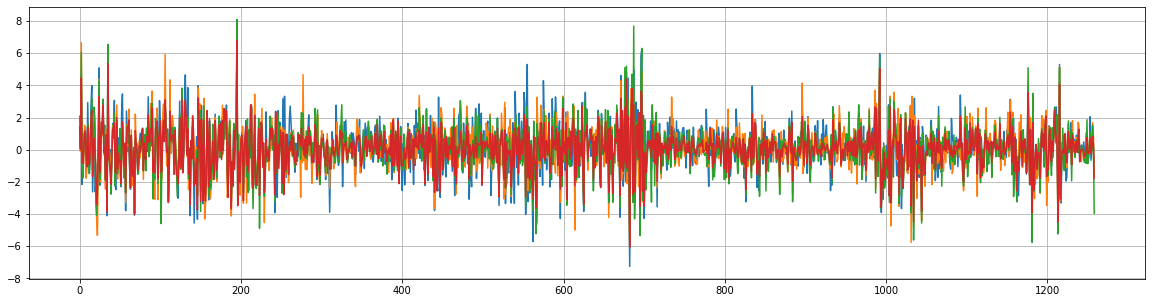

In [63]:
plt.figure(figsize=(20, 5))
plt.grid()

for i in range(change_array.shape[0]):
    plt.plot(change_array[i])

plt.show()

In [208]:
def compute_returns(period, threshold_return = 100, threshold_corr = 1.0):
    buy_data_list = []

    for i in range(change_array.shape[1]-2*period):

        d = change_array[:, i:i+period]
        corr_matrix = np.corrcoef(d)

        returns = np.sum(d, axis=1)

        least_return_arg, least_return_val = np.argmin(returns[:-1]), np.min(returns[:-1])
        least_corr_arg, least_corr_val = np.argmin(np.mean(corr_matrix, axis=0)[:-1]), np.min(np.mean(corr_matrix, axis=0)[:-1])
        
        if (least_return_arg == least_corr_arg) and (least_return_val < threshold_return) and (least_corr_val < threshold_corr):
            next_period = change_array[:, i+period:i+2*period][:-1]
            next_period_returns =  np.sum(next_period, axis=1)

            buy_data_list.append((least_return_arg, next_period_returns))
            
    
    return buy_data_list


In [221]:
period_range = np.arange(1, 11, 1)
threshold_return = 100
threshold_corr = 1.0

/home/thomas/miniconda3/envs/main_env/lib/python3.7/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/thomas/miniconda3/envs/main_env/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/thomas/miniconda3/envs/main_env/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


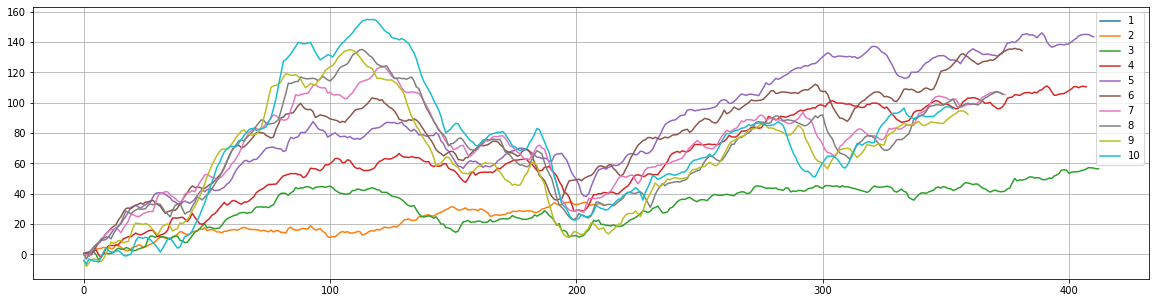

In [222]:
plt.figure(figsize=(20,5))
plt.grid()

for p in period_range:
    
    buy_data_list = compute_returns(p, threshold_return, threshold_corr)
    relative_returns = [val[1][0]-np.mean(val[1]) for val in buy_data_list]

    plt.plot(np.cumsum(relative_returns))
    
plt.legend(period_range)
plt.show()

/home/thomas/miniconda3/envs/main_env/lib/python3.7/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/thomas/miniconda3/envs/main_env/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/thomas/miniconda3/envs/main_env/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


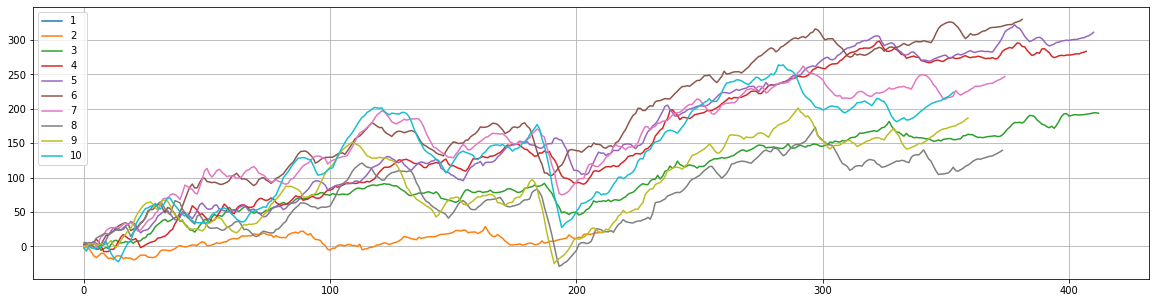

In [223]:
plt.figure(figsize=(20,5))
plt.grid()

for p in period_range:
    
    buy_data_list = compute_returns(p, threshold_return, threshold_corr)
    returns = [val[1][0] for val in buy_data_list]

    plt.plot(np.cumsum(returns))
    
plt.legend(period_range)
plt.show()

In [229]:
np.unique([val[0] for val in buy_data_list], return_counts=True)

(array([0, 1, 2]), array([142, 142,  70]))